In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [44]:
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')


In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [46]:
df = df.drop(columns=['customerID'])


In [47]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
print(df.duplicated().sum())


22


In [49]:
df = df.drop_duplicates()
print(df.duplicated().sum())


0


In [50]:
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [52]:
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [53]:
# Split features and target

y= df['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [54]:
# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['int64','float64']).columns.tolist()
print(num_cols)
print(cat_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [55]:
# Numeric preprocessing
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical preprocessing
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
# Combine pipelines
preprocess = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])
print(preprocess)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV

In [57]:
# Combine pipelines
preprocess = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])
print(preprocess)   



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV

In [58]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Modeling

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform

# Logistic Regression
logit_clf = Pipeline([
    ('prep', preprocess),
    ('model', LogisticRegression(max_iter=200))
])

# Random Forest
rf_clf = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestClassifier(random_state=42))
])
rf_grid = {
    'model__n_estimators': randint(200, 600),
    'model__max_depth': randint(4, 20),
    'model__min_samples_split': randint(2, 20),
    'model__min_samples_leaf': randint(1, 10)
}
rf_search = RandomizedSearchCV(
    rf_clf, rf_grid, n_iter=25, scoring='roc_auc', cv=5,
    random_state=42, n_jobs=-1, verbose=1
)

# XGBoost (optional)
xgb_clf = Pipeline([
    ('prep', preprocess),
    ('model', XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        tree_method='hist',
        random_state=42
    ))
])
xgb_grid = {
    'model__n_estimators': randint(200, 800),
    'model__max_depth': randint(3, 12),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4)
}
xgb_search = RandomizedSearchCV(
    xgb_clf, xgb_grid, n_iter=25, scoring='roc_auc', cv=5,
    random_state=42, n_jobs=-1, verbose=1
)


## Evaluation — Metrics & Plots

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\my-projects\new git projects\churn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



RandomForest AUC: 0.842
CM:
[[944  89]
 [196 176]]


LogisticRegression AUC: 0.840
CM:
[[932 101]
 [177 195]]



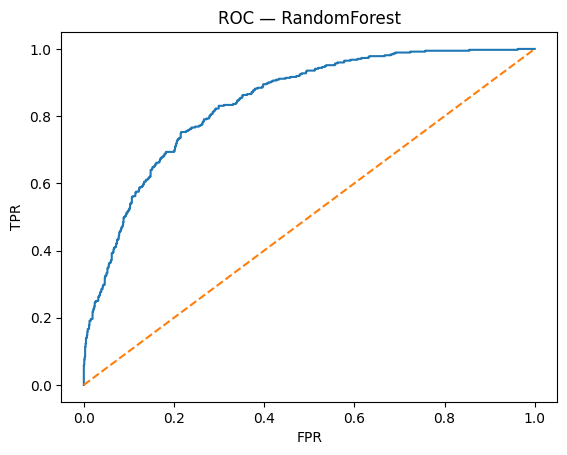

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import joblib, json
from pathlib import Path

# Fit Random Forest search
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

# Fit Logistic Regression
logit_clf.fit(X_train, y_train)

# Compare models
candidates = {
    'RandomForest': rf_best,
    'LogisticRegression': logit_clf
}

results = {}
for name, model in candidates.items():
    proba = model.predict_proba(X_test)[:,1]
    preds = (proba >= 0.5).astype(int)
    auc = roc_auc_score(y_test, proba)
    cm = confusion_matrix(y_test, preds)
    print(f"\n{name} AUC: {auc:.3f}\nCM:\n{cm}\n")
    results[name] = {'auc': float(auc), 'cm': cm.tolist()}

# Save best model
best_name = max(results, key=lambda k: results[k]['auc'])
best_model = candidates[best_name]
Path('artifacts').mkdir(exist_ok=True)
joblib.dump(best_model, '../artifacts/best_model.pkl')
json.dump({'results': results, 'best': best_name}, open('../artifacts/metrics.json','w'))

# ROC curve
proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title(f'ROC — {best_name}')
Path('../reports/figures').mkdir(parents=True, exist_ok=True)
plt.savefig('../reports/figures/roc_curve.png', dpi=200)
plt.show()


## Explainability & Feature Importance


Top 15 features (dummy-level):
 tenure                            0.019502
Contract_Month-to-month           0.013879
InternetService_Fiber optic       0.009537
OnlineSecurity_No                 0.005694
PaymentMethod_Electronic check    0.005196
InternetService_DSL               0.004769
TotalCharges                      0.004555
MonthlyCharges                    0.004128
TechSupport_No                    0.003915
Contract_Two year                 0.003060
TechSupport_Yes                   0.002918
SeniorCitizen                     0.002705
Contract_One year                 0.001708
StreamingMovies_Yes               0.001352
DeviceProtection_Yes              0.001139
dtype: float64


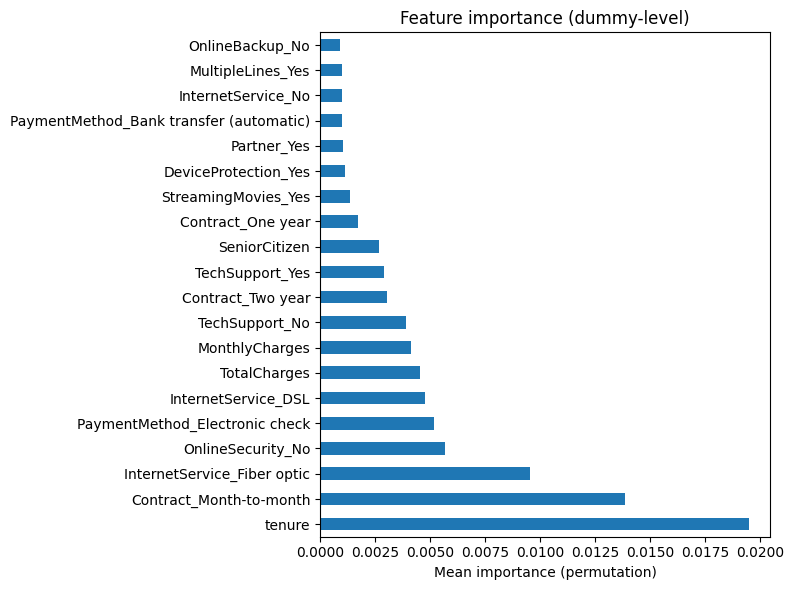


Top 15 features (grouped by original column):
                                                             feature  \
Contract                       tenureDependents_YesMultipleLines_No   
OnlineBackup      OnlineSecurity_No internet serviceStreamingTV_...   
MultipleLines     OnlineSecurity_NoTechSupport_NoPaymentMethod_B...   
PaymentMethod     gender_FemaleInternetService_Fiber opticOnline...   
DeviceProtection  MultipleLines_YesTechSupport_No internet servi...   
StreamingTV       TechSupport_YesContract_One yearPaperlessBilli...   
OnlineSecurity      TotalChargesDeviceProtection_YesStreamingTV_Yes   
InternetService         MonthlyChargesgender_MaleInternetService_No   
gender            StreamingMovies_No internet serviceContract_Tw...   
Partner                      InternetService_DSLDeviceProtection_No   
tenure                                                SeniorCitizen   
StreamingMovies   MultipleLines_No phone serviceOnlineBackup_NoS...   
MonthlyCharges               

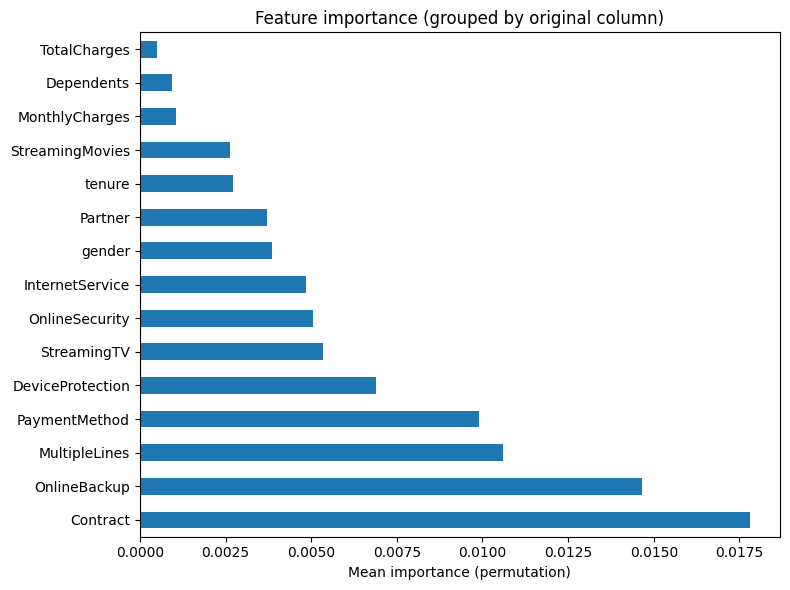

In [87]:
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Transform X_test using your preprocessor
X_test_transformed = best_model.named_steps['prep'].transform(X_test)

# 2. Run permutation importance on the model only
r = permutation_importance(
    best_model.named_steps['model'], 
    X_test_transformed, 
    y_test, 
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)

# 3. Get expanded feature names (numeric + OHE categories)
ohe = best_model.named_steps['prep'].named_transformers_['cat'].named_steps['ohe']
cat_features = ohe.get_feature_names_out(best_model.named_steps['prep'].transformers_[1][2])
num_features = best_model.named_steps['prep'].transformers_[0][2]
feature_names = np.concatenate([num_features, cat_features])

# ------------------------------
# VERSION 1: Detailed (dummy-level)
# ------------------------------
fi_detailed = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False)

print("\nTop 15 features (dummy-level):\n", fi_detailed.head(15))

fi_detailed.head(20).plot(kind='barh', figsize=(8,6))
plt.title("Feature importance (dummy-level)")
plt.xlabel("Mean importance (permutation)")
plt.tight_layout()
plt.savefig("reports/figures/feature_importance_detailed.png", dpi=200)
plt.show()

# ------------------------------
# VERSION 2: Grouped (original column-level)
# ------------------------------
# Map each feature name back to its original column
feature_to_col = {f: f.split("_")[0] if "_" in f else f for f in feature_names}

# Build grouped importance
fi_grouped = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": r.importances_mean
    })
    .groupby(fi_detailed.index.map(lambda f: feature_to_col[f]))
    .sum()
    .sort_values("importance", ascending=False)
)

print("\nTop 15 features (grouped by original column):\n", fi_grouped.head(15))

fi_grouped.head(15).plot(kind='barh', figsize=(8,6), legend=False)
plt.title("Feature importance (grouped by original column)")
plt.xlabel("Mean importance (permutation)")
plt.tight_layout()
plt.savefig("../reports/figures/feature_importance_grouped.png", dpi=200)
plt.show()


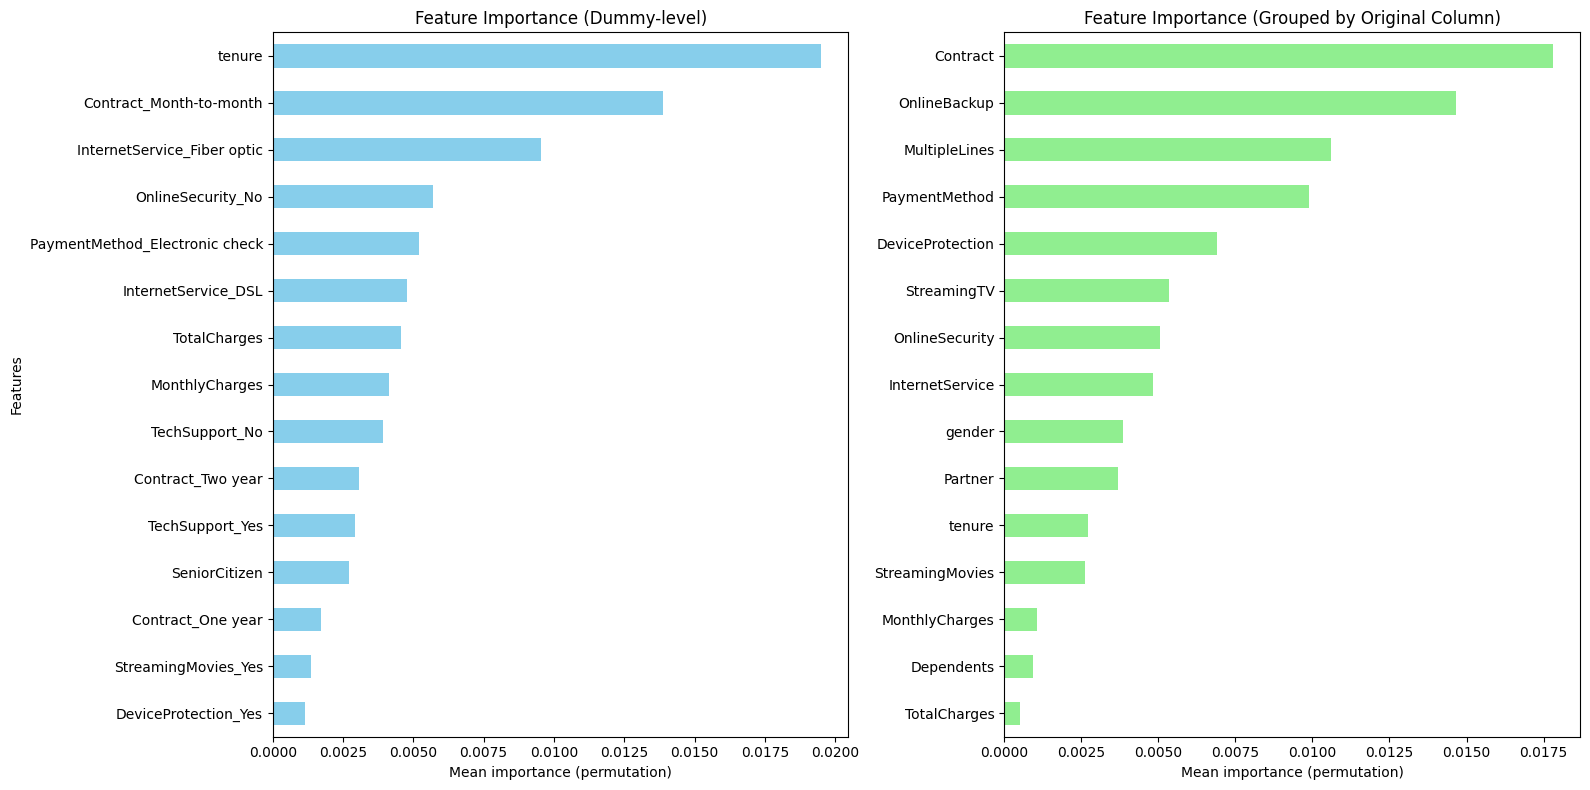

In [88]:
import matplotlib.pyplot as plt

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Detailed (dummy-level)
fi_detailed.head(15).sort_values().plot(
    kind='barh', ax=axes[0], color='skyblue'
)
axes[0].set_title("Feature Importance (Dummy-level)")
axes[0].set_xlabel("Mean importance (permutation)")
axes[0].set_ylabel("Features")

# Plot 2: Grouped (original column-level)
fi_grouped.head(15).sort_values("importance").plot(
    kind='barh', ax=axes[1], color='lightgreen', legend=False
)
axes[1].set_title("Feature Importance (Grouped by Original Column)")
axes[1].set_xlabel("Mean importance (permutation)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.savefig("../reports/figures/feature_importance_side_by_side.png", dpi=200)
plt.show()


In [89]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.drop(columns=['customerID'])

# Ensure target is Yes/No
target = 'Churn'

# Key high-impact columns from your feature importance
high_impact_cols = ['Contract', 'OnlineBackup', 'DeviceProtection', 'PaymentMethod',
                    'InternetService', 'tenure', 'MonthlyCharges']

# Function to get churn % for categorical features
def churn_rate_cat(df, col):
    return (pd.crosstab(df[col], df[target], normalize='index')['Yes']*100).round(2)

# Function to get churn % for numeric features by binning
def churn_rate_num(df, col, bins=5):
    binned = pd.cut(df[col], bins)
    return (pd.crosstab(binned, df[target], normalize='index')['Yes']*100).round(2)

# Build summary dictionary
summary = {}
for col in high_impact_cols:
    if df[col].dtype == 'object':
        summary[col] = churn_rate_cat(df, col)
    else:
        summary[col] = churn_rate_num(df, col)

# Convert to DataFrame for display
for col, sr in summary.items():
    print(f"\nChurn % by {col}:\n{sr}")



Churn % by Contract:
Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Yes, dtype: float64

Churn % by OnlineBackup:
OnlineBackup
No                     39.93
No internet service     7.40
Yes                    21.53
Name: Yes, dtype: float64

Churn % by DeviceProtection:
DeviceProtection
No                     39.13
No internet service     7.40
Yes                    22.50
Name: Yes, dtype: float64

Churn % by PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: Yes, dtype: float64

Churn % by InternetService:
InternetService
DSL            18.96
Fiber optic    41.89
No              7.40
Name: Yes, dtype: float64

Churn % by tenure:
tenure
(-0.072, 14.4]    46.35
(14.4, 28.8]      26.20
(28.8, 43.2]      21.74
(43.2, 57.6]      14.99
(57.6, 72.0]       7.33
Name: Yes, dtype: float64

Churn % by MonthlyCharges:
MonthlyCharges
(1

## predict churn

In [91]:
new_customer = pd.DataFrame([{
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 5,
    "PhoneService": "Yes",
    "MultipleLines": "No",
    "InternetService": "Fiber optic",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "Yes",
    "StreamingMovies": "Yes",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 85.50,
    "TotalCharges": 425.50
}])




In [93]:
new_transformed = best_model.named_steps['prep'].transform(new_customer)


In [94]:
churn_prob = best_model.named_steps['model'].predict_proba(new_transformed)[:,1]
churn_label = best_model.named_steps['model'].predict(new_transformed)

print("Churn probability:", churn_prob[0])
print("Churn prediction (0=No, 1=Yes):", churn_label[0])


Churn probability: 0.6593166496339619
Churn prediction (0=No, 1=Yes): 1


In [95]:
new_customer_no_churn = pd.DataFrame([{
    "gender": "Male",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 48,
    "PhoneService": "Yes",
    "MultipleLines": "Yes",
    "InternetService": "DSL",
    "OnlineSecurity": "Yes",
    "OnlineBackup": "Yes",
    "DeviceProtection": "Yes",
    "TechSupport": "Yes",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Two year",
    "PaperlessBilling": "No",
    "PaymentMethod": "Mailed check",
    "MonthlyCharges": 55.25,
    "TotalCharges": 2640.50
}])

new_transformed = best_model.named_steps['prep'].transform(new_customer_no_churn)

churn_prob = best_model.named_steps['model'].predict_proba(new_transformed)[:,1]
churn_label = best_model.named_steps['model'].predict(new_transformed)

print("Churn probability:", churn_prob[0])
print("Churn prediction (0=No, 1=Yes):", churn_label[0])



Churn probability: 0.040101844990696744
Churn prediction (0=No, 1=Yes): 0
